In [2]:
# Imports
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import re


# Collection of Relevant Metrics

**To compare the Twitter usage between American Air and Air France, you'll want to gather metrics that provide insights into their social media activities.**

### 1. Volume of Tweets per Airline

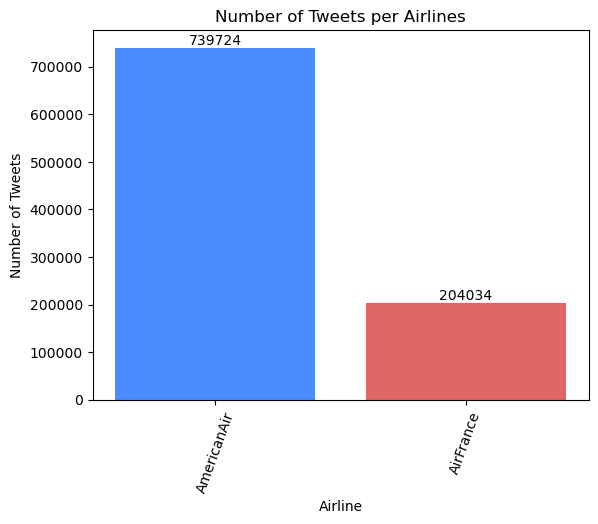

In [9]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# Define the queries
queries = [
    "SELECT COUNT(*) FROM nikita WHERE text LIKE '%AmericanAir%' OR text LIKE '%American Air%' OR text LIKE '%American Airlines%'",
    "SELECT COUNT(*) FROM nikita WHERE text LIKE '%AirFrance%' OR text LIKE '%Air France%'"]

# Execute the queries
results = []
for query in queries:
    c.execute(query)
    result = c.fetchone()[0]
    results.append(result)

# Extract the results
airline_names = ['AmericanAir', 'AirFrance']
tweet_counts = results

colors = ['gray'] * len(airline_names)
colors[airline_names.index('AmericanAir')] = '#4a8cff'
colors[airline_names.index('AirFrance')] = '#e06666'
# Create a bar plot
plt.bar(airline_names, tweet_counts, color=colors)

# Create a bar plot
bars = plt.bar(airline_names, tweet_counts, color=colors)

# Add labels and title
plt.xlabel('Airline')
plt.xticks(airline_names, rotation=70)
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Airlines')

# Add the data value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Show the plot
plt.show()


# Close the database connection
conn.close()

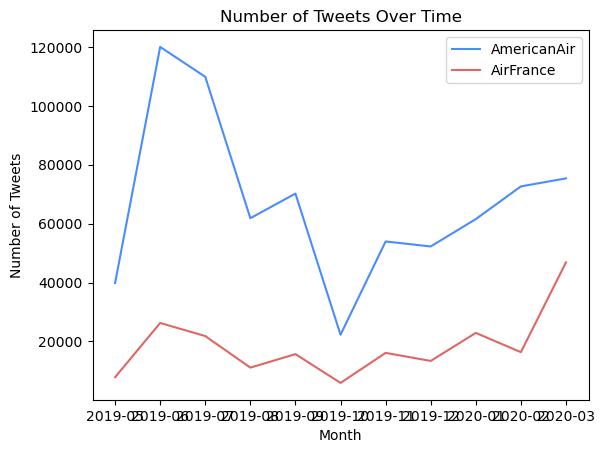

In [17]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# SQL query to count the number of tweets per month
query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_tweets
FROM nikita
WHERE text LIKE '%AmericanAir%' OR text LIKE '%American Air%' OR text LIKE '%American Airlines%'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
american_air_months = [result[0] for result in results]
american_air_counts = [result[1] for result in results]

query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_tweets
FROM nikita
WHERE text LIKE '%AirFrance%' OR text LIKE '%Air France%'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
air_france_months = [result[0] for result in results]
air_france_counts = [result[1] for result in results]

# Create a line chart
plt.plot(american_air_months, american_air_counts, color='#4a8cff', label='AmericanAir')
plt.plot(air_france_months, air_france_counts, color='#e06666', label='AirFrance')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.legend()

# Show the plot
plt.show()

# Close the database connection
conn.close()

### 2. Number of Conversations

**This is only considering the follwoing:**

A conversation is defined as a series of tweets in between two or more users, and in our case the texts are related to each other using the in_reply_status_id, in_reply_to_user_id, quoted_status_id and is_quote_status columns.

So in the following cases:
- Case 1: Tweet initialized by the client who is complaining something regarding the airline, then airline replies and the client answers to that tweet. This could develop into a bigger thread, which is basically a long conversation.
- Case 2: When a random Tweet of airline is replied by a client complaining about something, then airline replies once again and solves/helps the client.
- Case 3: When a Tweet from an Airline is replied by a client and then another client joins the conversation by replying to the 1st client.
- Multi-Party Conversations: These are conversations that involve more than two participants. For example, a customer might tweet a complaint, the airline responds, and then other users join in the conversation either in support of the customer or the airline.
- Retweet-Based / Quoted-Based Conversations: These are conversations that occur in the replies to a retweet. For instance, a user could retweet an airline's promotional post and add their own comment, sparking a conversation.
- Hashtag-Driven Conversations: These are conversations that revolve around a specific hashtag. This could be a trending topic, or a specific campaign initiated by the airline.


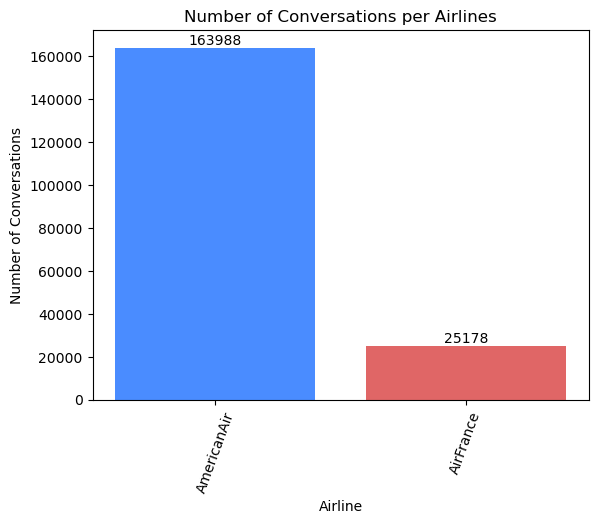

In [13]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# Define the queries
queries = [
    """SELECT COUNT(DISTINCT in_reply_to_status_id)
       FROM nikita
       WHERE (text LIKE '%AmericanAir%' OR text LIKE '%American Air%' OR text LIKE '%American Airlines%')
       AND (in_reply_to_status_id IS NOT NULL OR quoted_status_id IS NOT NULL OR is_quote_status = 1)""",
    """SELECT COUNT(DISTINCT in_reply_to_status_id)
       FROM nikita
       WHERE (text LIKE '%AirFrance%' OR text LIKE '%Air France%')
       AND (in_reply_to_status_id IS NOT NULL OR quoted_status_id IS NOT NULL OR is_quote_status = 1)"""
]

# Execute the queries
results = []
for query in queries:
    c.execute(query)
    result = c.fetchone()[0]
    results.append(result)

# Extract the results
airline_names = ['AmericanAir', 'AirFrance']
conversation_counts = results

colors = ['gray'] * len(airline_names)
colors[airline_names.index('AmericanAir')] = '#4a8cff'
colors[airline_names.index('AirFrance')] = '#e06666'

# Create a bar plot
bars = plt.bar(airline_names, conversation_counts, color=colors)

# Add labels and title
plt.xlabel('Airline')
plt.xticks(airline_names, rotation=70)
plt.ylabel('Number of Conversations')
plt.title('Number of Conversations per Airlines')

# Add the number of conversations above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

# Close the database connection
conn.close()

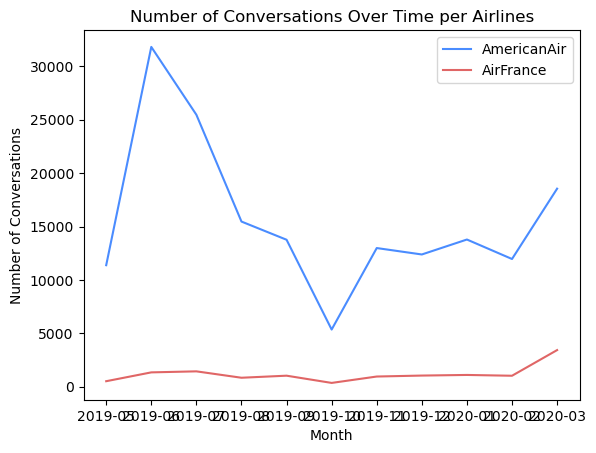

In [19]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# SQL query to count the number of conversations per month
query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_conversations
FROM nikita
WHERE in_reply_to_user_id = '22536055'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
american_air_months = [result[0] for result in results]
american_air_conversations = [result[1] for result in results]

query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_conversations
FROM nikita
WHERE in_reply_to_user_id = '106062176'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
air_france_months = [result[0] for result in results]
air_france_conversations = [result[1] for result in results]

# Create a line chart
plt.plot(american_air_months, american_air_conversations, color='#4a8cff', label='AmericanAir')
plt.plot(air_france_months, air_france_conversations, color='#e06666', label='AirFrance')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Conversations')
plt.title('Number of Conversations Over Time per Airlines')
plt.legend()

# Show the plot
plt.show()

# Close the database connection
conn.close()

### 3. Number of Replies

**Number of replies made by each airline.**

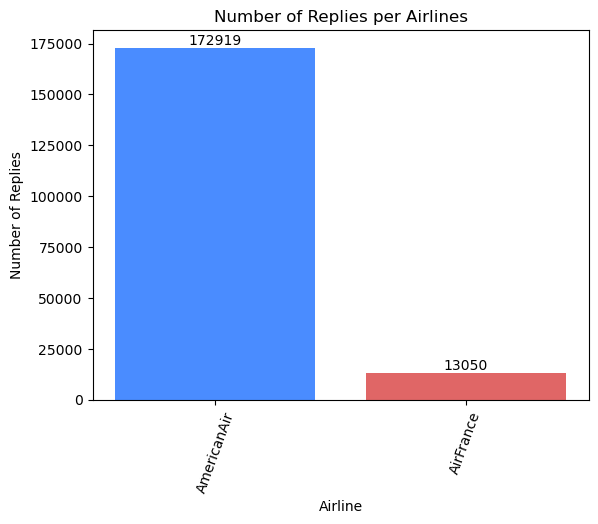

In [15]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# Twitter user IDs for the airlines
american_air_id = '22536055'
airfrance_id = '106062176'

# SQL queries to count the number of replies
queries = [
    f"SELECT COUNT(*) FROM nikita WHERE in_reply_to_user_id = '{american_air_id}'",
    f"SELECT COUNT(*) FROM nikita WHERE in_reply_to_user_id = '{airfrance_id}'",
]

# Execute the queries
reply_counts = []
for query in queries:
    c.execute(query)
    result = c.fetchone()[0]
    reply_counts.append(result)

# Create a bar plot
bars = plt.bar(airline_names, reply_counts, color=colors)

# Add labels and title
plt.xlabel('Airline')
plt.xticks(airline_names, rotation=70)
plt.ylabel('Number of Replies')
plt.title('Number of Replies per Airlines')

# Add the number of replies above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

# Close the database connection
conn.close()


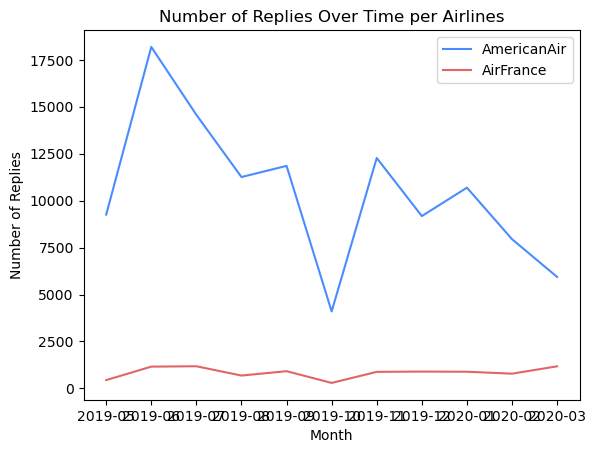

In [20]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# SQL query to count the number of replies per month
query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_replies
FROM nikita
WHERE user_id = '22536055'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
american_air_months = [result[0] for result in results]
american_air_replies = [result[1] for result in results]

query = """
SELECT strftime('%Y-%m', created_at) as month, COUNT(*) as num_replies
FROM nikita
WHERE user_id = '106062176'
GROUP BY month
"""
c.execute(query)
results = c.fetchall()
air_france_months = [result[0] for result in results]
air_france_replies = [result[1] for result in results]

# Create a line chart
plt.plot(american_air_months, american_air_replies, color='#4a8cff', label='AmericanAir')
plt.plot(air_france_months, air_france_replies, color='#e06666', label='AirFrance')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Replies')
plt.title('Number of Replies Over Time per Airlines')
plt.legend()

# Show the plot
plt.show()

# Close the database connection
conn.close()

**We can see a kind of correlation between the number of conversations graph and replies of AmericanAir.**

### 4. Conversation Length

**Length of the conversations involving each airline.**

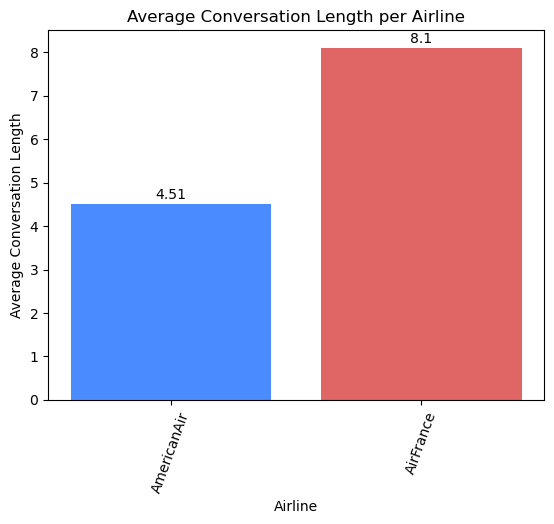

In [16]:
# Connect to the database
conn = sqlite3.connect('dbl_10.db')
c = conn.cursor()

# SQL queries to count the number of replies to each original tweet
queries = [
    f"SELECT in_reply_to_status_id, COUNT(*) as num_replies FROM nikita WHERE text LIKE '%AmericanAir%' OR text LIKE '%American Air%' OR text LIKE '%American Airlines%' GROUP BY in_reply_to_status_id",
    f"SELECT in_reply_to_status_id, COUNT(*) as num_replies FROM nikita WHERE text LIKE '%AirFrance%' OR text LIKE '%Air France%' GROUP BY in_reply_to_status_id",
]

# Execute the queries and store the lengths of all conversations
conversation_lengths = []
for query in queries:
    c.execute(query)
    results = c.fetchall()
    lengths = [result[1] for result in results if result[0] is not None]  # exclude original tweets with no replies
    conversation_lengths.append(lengths)

# Calculate the average conversation length for each airline
average_lengths = [sum(lengths) / len(lengths) for lengths in conversation_lengths]

# Create a bar plot
bars = plt.bar(airline_names, average_lengths, color=colors)

# Add labels and title
plt.xlabel('Airline')
plt.xticks(airline_names, rotation=70)
plt.ylabel('Average Conversation Length')
plt.title('Average Conversation Length per Airline')

# Add the number of replies above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

# Close the database connection
conn.close()

### 2.3 Draw Insights:
**The insights you draw will depend on what the data shows, but some possibilities might include:**

**Activity Level: Which airline is more active on Twitter? Does one airline respond more frequently to customer tweets?**

**Engagement Level: Which airline engages in longer conversations? Does one airline tend to have more back-and-forth exchanges with customers?**

**Temporal Patterns: Are there patterns in when the airlines post? For example, do they post more frequently at certain times of day or days of the week?**